In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18a9bd10>,
      dtype=object)

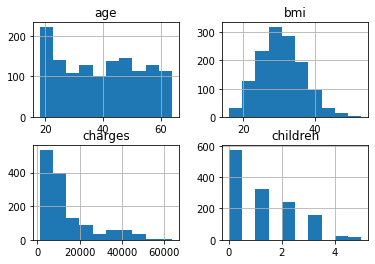

In [6]:
data.hist()

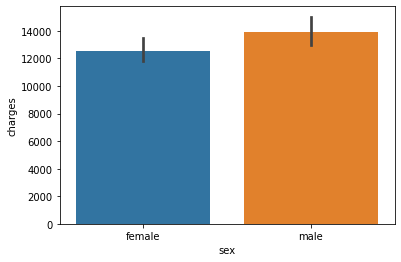

In [7]:
sns.barplot(data['sex'], data['charges'])

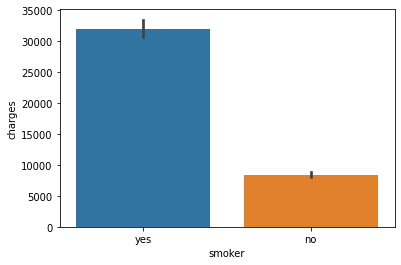

In [8]:
sns.barplot(data['smoker'], data['charges'])

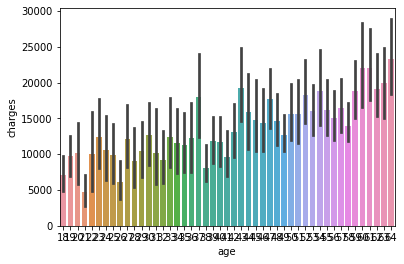

In [9]:
sns.barplot(data['age'].round(), data['charges'])

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data_cat = data[[col for col in data.columns.values if data[col].dtype=='object']]
data_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [13]:
data_num = data.drop([col for col in data.columns.values if data[col].dtype=='object'],axis=1)

In [14]:
data_cat_dummies = pd.get_dummies(data_cat, drop_first=True)
data_cat_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [15]:
data = pd.concat([data_num, data_cat_dummies],axis=1)

In [16]:
features = data.iloc[:,0:6]
target = data['charges']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [18]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(features, target)
y_pred = model_LR.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [19]:
y_pred

,0
0,9724.53000
1,8547.69130
2,45702.02235
3,12950.07120
4,9644.25250
...,...
397,3277.16100
398,17942.10600
399,10226.28420
400,14418.28040


In [20]:
model_LR.score(x_train, y_train)

1.0

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

7.714867992650958e-12
8.788896891536685e-23
9.374911675070163e-12
1.0
